# PyROOT
E' il binding python di root. Oltre a portare tutte le feature di root su python permette di caricare header e codice c++ in python 

In [2]:
import ROOT

Welcome to JupyROOT 6.26/02


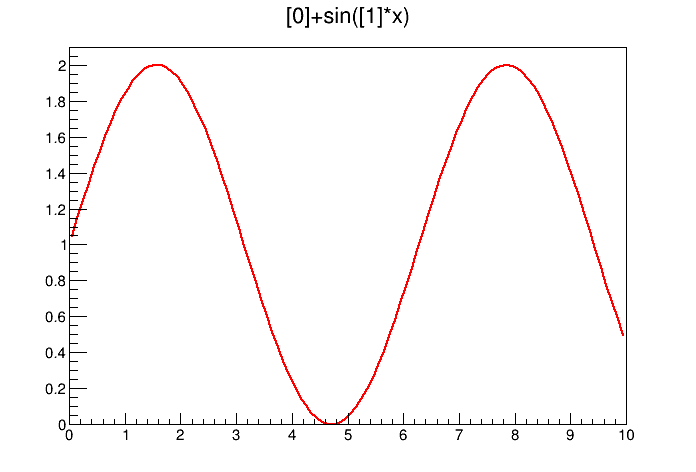

In [14]:
#Esempio plot funzione
g=ROOT.TGraph()
c=ROOT.TCanvas()
func=ROOT.TF1("func","[0]+sin([1]*x)",0,10)
func.SetParameters(1,1)
func.Draw()
c.Draw()


## Importare codice cpp
Per importare il codice basta scrivere il sorgente (o importarlo) come stringa e poi eseguirlo con
ROOT.gInterpreter.ProcessLine(cpp_string)

(Si possono fare anche cose abbastanza complicate come creare delle classi in modo da poter creare delle istanze direttamente in python)

E' possibile caricare anche una shared library usando il comando ROOT.gSystem.Load(path)

In [4]:
cpp_code="""
int f(int i){return i*i;}
"""
ROOT.gInterpreter.ProcessLine(cpp_code)
x=ROOT.f(5)
print(x)

#La stessa cosa si può fare se si vuole importare un header o una shared library

25


# Files
Funziona essenzialmente tutto come ROOT in c++

In [24]:
import numpy as np
f= ROOT.TFile("file.root","RECREATE")
tree=ROOT.TTree("tree","tree")
x=np.array([1,2,3,4,5]).astype(np.float32) #E' importante far matchare i tipi
tree.Branch("x",x,'x[5]/F')
tree.Fill()
f.Write()
f.Close()

# TTree

In [25]:
f=ROOT.TFile.Open("file.root")
f.tree.ls()

OBJ: TTree	tree	tree : 0 at: 0x56463a84a000


In [26]:
f.tree.Scan()

5

***********************************
*    Row   * Instance *       x.x *
***********************************
*        0 *        0 *         1 *
*        0 *        1 *         2 *
*        0 *        2 *         3 *
*        0 *        3 *         4 *
*        0 *        4 *         5 *
***********************************


In [34]:
for row in f.tree:
    print(np.array(row.x))

[1. 2. 3. 4. 5.]


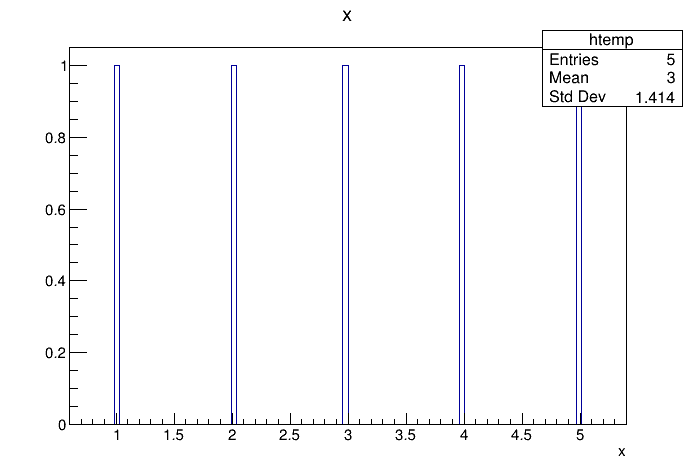

In [37]:
c=ROOT.TCanvas()
f.tree.Draw("x")
c.Draw()